In [22]:
import numpy as np
import cv2

In [23]:
from keras.models import load_model
model = load_model('')

In [24]:
cv2.ocl.setUseOpenCL(False)
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}
cascade_classifier = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    gray_img = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    #gray_img = img_gray.reshape(img_gray.shape[0],img_gray.shape[1],1)
    if not ret:
        break
    else:
        face = cascade_classifier.detectMultiScale(gray_img,scaleFactor=1.3,minNeighbors=5)
        for (x,y,w,h) in face:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),5)
            roi = gray_img[y:y+h,x:x+w]
            roi_resized = cv2.resize(roi,(48,48))
            img_pred=np.expand_dims(np.expand_dims(cv2.resize(roi_resized, (48, 48)), -1), 0)
            #img_pred = np.expand_dims(roi_resized,axis=0)
            predict = model.predict_classes(img_pred)
            cv2.putText(frame,text=emotion_dict[predict[0]],org=(x+20,y-60),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=2,color=(255,255,255),thickness=5,lineType=cv2.LINE_AA)
        cv2.imshow('Facial Expression',cv2.resize(frame,(1280,720)))
        if cv2.waitKey(2) & 0xFF == ord('q'):
            break
            
cap.release()
cv2.destroyAllWindows()

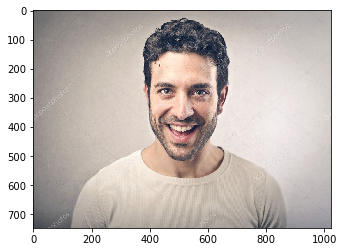

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
img = cv2.imread('h.jpg')
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(gray_img)

In [19]:
gray_img.shape[1]

1023

In [21]:
gray_img.shape

(748, 1023, 3)